In [75]:
import os
import pandas as pd
import numpy as np
import sys
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
import sklearn.metrics as metrics
from sklearn.metrics import brier_score_loss, roc_curve, auc, confusion_matrix, roc_auc_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from stargazer import stargazer
from statsmodels.tools.eval_measures import mse,rmse
import matplotlib.pyplot as plt
from mizani.formatters import percent_format
pd.set_option('display.max_columns', None)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix, classification_report, brier_score_loss

import warnings
warnings.filterwarnings('ignore')

In [76]:
data = pd.read_csv("https://raw.githubusercontent.com/Jk33033/DA3_hw3/main/cs_bisnode_panel.csv")


In [77]:
data.describe()

,comp_id,COGS,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,finished_prod,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,net_dom_sales,net_exp_sales,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,wages,D,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,exit_year,ceo_count,foreign,female,birth_year,inoffice_days,nace_main,ind2,ind,urban_m,labor_avg
count,2.878290e+05,1.825700e+04,2.797890e+05,2.876980e+05,2.876980e+05,2.693000e+05,2.693000e+05,2.706260e+05,1.748500e+04,2.876980e+05,2.803920e+05,2.876890e+05,2.876980e+05,2.876980e+05,2.797890e+05,1.825700e+04,1.825700e+04,2.797890e+05,2.779450e+05,2.803920e+05,2.876980e+05,2.876980e+05,2.863590e+05,1.798300e+04,0.0,287829.000000,287829.000000,287829.000000,287829.000000,231372.000000,38859.000000,231402.000000,231402.000000,231402.000000,176011.000000,231402.000000,286791.000000,286791.000000,278060.000000,287829.000000,141297.000000
mean,1.540862e+11,4.601683e+05,2.353264e+04,2.209395e+05,1.742499e+05,1.521749e+03,3.754458e+03,2.229149e+03,1.056481e+05,3.393731e+05,2.332423e+04,3.782416e+04,6.052729e+04,4.098719e+04,3.594648e+05,2.118066e+06,3.368463e+06,9.229396e+04,5.152337e+03,5.042513e+05,2.350564e+05,7.741440e+04,2.216273e+05,6.554714e+05,NaN,0.013327,345.584719,0.100237,2010.570356,2002.177545,2013.950102,1.254038,0.115653,0.255157,1964.902661,3205.323629,4858.231479,48.353062,2.692023,2.067075,1.009435
std,1.382424e+11,2.614149e+06,8.216668e+05,4.182020e+06,3.730357e+06,7.237342e+04,1.727794e+05,1.611169e+05,5.338053e+05,1.823176e+07,2.413799e+06,6.260181e+06,6.670054e+05,6.602564e+05,2.940907e+06,6.746671e+06,1.135202e+07,7.058337e+05,1.892475e+06,3.861890e+06,7.465366e+06,1.746095e+06,2.580851e+06,1.725947e+06,NaN,0.114673,65.537706,0.300316,3.180848,6.931043,2.160074,0.517837,0.308518,0.406538,11.546875,1880.553038,1250.012437,12.570550,0.512269,0.847473,4.771655
min,1.001034e+06,-8.445704e+05,-3.076704e+05,-5.555556e+05,-7.727111e+05,-4.902703e+05,-2.744074e+05,-6.181263e+06,0.000000e+00,-2.394226e+06,-3.355148e+08,-3.770370e+03,-3.069630e+04,-5.555556e+05,-1.239974e+07,-8.458481e+05,-1.470007e+07,-4.338074e+05,-3.355148e+08,-1.472559e+07,-4.210445e+07,-5.555556e+05,-2.390456e+06,-1.825248e+06,NaN,0.000000,0.000000,0.000000,2005.000000,1950.000000,1997.000000,1.000000,0.000000,0.000000,1920.000000,1.000000,111.000000,1.000000,1.000000,1.000000,0.000000
25%,2.868635e+10,0.000000e+00,3.333333e+01,2.203704e+03,1.833333e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.388889e+03,0.000000e+00,0.000000e+00,3.370370e+02,3.433333e+03,1.775926e+04,0.000000e+00,4.888889e+02,-3.270370e+03,5.295370e+03,-4.533333e+03,1.851852e+03,0.000000e+00,3.500000e+03,NaN,0.000000,364.000000,0.000000,2008.000000,1996.000000,2013.000000,1.000000,0.000000,0.000000,1956.000000,1775.000000,3314.000000,33.000000,2.000000,1.000000,0.090909
50%,1.152850e+11,7.040741e+03,7.814815e+02,9.592593e+03,1.049259e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.825926e+03,7.037037e+01,0.000000e+00,4.555555e+02,1.851852e+03,2.361481e+04,1.943373e+05,0.000000e+00,7.885185e+03,0.000000e+00,3.280741e+04,3.838889e+03,5.555556e+03,3.311111e+03,6.485555e+04,NaN,0.000000,364.000000,0.000000,2011.000000,2002.000000,2015.000000,1.000000,0.000000,0.000000,1966.000000,2838.000000,5610.000000,56.000000,3.000000,2.000000,0.243056
75%,2.593958e+11,1.063000e+05,4.003704e+03,3.552130e+04,4.101852e+04,0.000000e+00,0.000000e+00,0.000000e+00,3.592592e+02,3.593982e+04,3.774074e+03,0.000000e+00,5.580556e+03,9.503704e+03,8.700000e+04,1.601967e+06,6.323333e+05,2.640741e+04,1.914815e+03,1.210056e+05,2.706296e+04,1.111111e+04,3.299630e+04,5.497648e+05,NaN,0.000000,364.000000,0.000000,2013.000000,2008.000000,2016.000000,1.000000,0.000000,0.500000,1974.000000,4468.750000,5610.000000,56.000000,3.000000,3.000000,0.583333
max,4.641209e+11,9.499693e+07,1.820889e+08,1.299011e+09,1.683374e+09,1.704172e+07,7.233078e+07

In [78]:
data.columns

Index(['comp_id', 'begin', 'end', 'COGS', 'amort', 'curr_assets', 'curr_liab',
       'extra_exp', 'extra_inc', 'extra_profit_loss', 'finished_prod',
       'fixed_assets', 'inc_bef_tax', 'intang_assets', 'inventories',
       'liq_assets', 'material_exp', 'net_dom_sales', 'net_exp_sales',
       'personnel_exp', 'profit_loss_year', 'sales', 'share_eq',
       'subscribed_cap', 'tang_assets', 'wages', 'D', 'balsheet_flag',
       'balsheet_length', 'balsheet_notfullyear', 'year', 'founded_year',
       'exit_year', 'ceo_count', 'foreign', 'female', 'birth_year',
       'inoffice_days', 'gender', 'origin', 'nace_main', 'ind2', 'ind',
       'urban_m', 'region_m', 'founded_date', 'exit_date', 'labor_avg'],
      dtype='object')

In [79]:
# Create target variable indicating default
data['default'] = ((data['year'] == 2015) &
                           ((data['sales'] == 0) |
                           (data['sales'].isna())))

# Data cleaning

In [80]:
data.isnull().sum()

comp_id                      0
begin                        0
end                          0
COGS                    269572
amort                     8040
curr_assets                131
curr_liab                  131
extra_exp                18529
extra_inc                18529
extra_profit_loss        17203
finished_prod           270344
fixed_assets               131
inc_bef_tax               7437
intang_assets              140
inventories                131
liq_assets                 131
material_exp              8040
net_dom_sales           269572
net_exp_sales           269572
personnel_exp             8040
profit_loss_year          9884
sales                     7437
share_eq                   131
subscribed_cap             131
tang_assets               1470
wages                   269846
D                       287829
balsheet_flag                0
balsheet_length              0
balsheet_notfullyear         0
year                         0
founded_year             56457
exit_yea

In [81]:
# 'columns_to_drop' is a list containing the names of the columns to be dropped
columns_to_drop = ['COGS', 'finished_prod', 'net_dom_sales','net_exp_sales','wages','D','exit_year','exit_date','begin','end','birth_year','founded_year','founded_date']
# Dropping multiple columns from the DataFrame
data.drop(columns=columns_to_drop, inplace=True)

In [82]:
# 'columns_to_fill' is a list containing the names of the columns you want to fill missing values with mode
columns_to_fill = ['gender','origin','region_m']

# Fill missing values in specified columns with mode
for column in columns_to_fill:
    mode_value = data[column].mode()[0]  # Calculate mode for the column
    data[column].fillna(mode_value, inplace=True)

In [83]:
# Make hold out data before fill the null with the mean value
# Filter data based on 'ind2 == 26'
# Filter data based on conditions for hold-out sample creation
holdout_data = data[data['ind2'] == 26] 
holdout_data_id = holdout_data[(holdout_data['year'] == 2014) & 
                         (holdout_data['sales'] >= 1000) & 
                         (holdout_data['sales'] <= 10000000)]['comp_id'].unique()# group by id
holdout_data = holdout_data[holdout_data['comp_id'].isin(holdout_data_id)]#data_holdout has all years of the id 

In [84]:
# Assuming 'columns_to_fill' is a list containing the names of the columns you want to fill with the mean
columns_to_fill = ['amort', 'material_exp', 'personnel_exp','ceo_count','foreign','female','inoffice_days','labor_avg','curr_assets','curr_liab','extra_exp', 'extra_inc',
       'extra_profit_loss', 'fixed_assets', 'inc_bef_tax', 'intang_assets', 'inventories', 'liq_assets','profit_loss_year', 'sales', 'share_eq', 'subscribed_cap',
       'tang_assets', 'nace_main', 'ind2', 'ind']

# Filling missing values in multiple columns with the mean
data[columns_to_fill] = data[columns_to_fill].fillna(data[columns_to_fill].mean())
holdout_data[columns_to_fill] = holdout_data[columns_to_fill].fillna(holdout_data[columns_to_fill].mean())

In [85]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'columns_to_encode' is a list containing the names of the columns you want to label encode
columns_to_encode = ['gender', 'origin', 'region_m','default']

# Iterate through each column and perform label encoding
for col in columns_to_encode:
    label_encoder = LabelEncoder()
    data[col] = label_encoder.fit_transform(data[col])
    holdout_data[col] = label_encoder.fit_transform(holdout_data[col])

In [86]:
#check if there are 981 firms that stayed alive
#already filtered for existence in 2014 above
holdout_data_alive_id = holdout_data[(holdout_data['year'] == 2015) 
                                    & (holdout_data['sales'] > 0 )]['comp_id'].unique()
holdout_data_default_id = holdout_data[(holdout_data['comp_id'].isin(holdout_data_alive_id)) == False]['comp_id'].unique()

" If you do the sample design properly, you have an overall of 1037 firms. 56 firms defaulted, and 981
stayed alive. The average sales of the firms is 0.4902 million EUR, with the minimum of 0.00107 million
EUR and 9.57648 million EUR."

In [106]:
total_firms = len(holdout_data_id)
defaulted_firms = len(holdout_data_default_id)
alive_firms = len(holdout_data_alive_id)

# Calculate average sales of firms
average_sales = holdout_data[(holdout_data['comp_id'].isin(holdout_data_id)) & (holdout_data['year'] == 2014)]['sales'].mean()
min_sales = holdout_data[(holdout_data['comp_id'].isin(holdout_data_id)) & (holdout_data['year'] == 2014)]['sales'].min()
max_sales = holdout_data[(holdout_data['comp_id'].isin(holdout_data_id)) & (holdout_data['year'] == 2014)]['sales'].max()
# Print the summary statistics
print(f"Total firms: {total_firms}")
print(f"Defaulted firms: {defaulted_firms}")
print(f"Alive firms: {alive_firms}")
print(f"Average sales (EUR): {average_sales:.6f}")
print(f"Minimum sales (EUR): {min_sales:.6f}")
print(f"Maximum sales (EUR): {max_sales:.6f}")

Total firms: 1037
Defaulted firms: 56
Alive firms: 981
Average sales (EUR): 490202.217927
Minimum sales (EUR): 1070.370361
Maximum sales (EUR): 9576485.000000


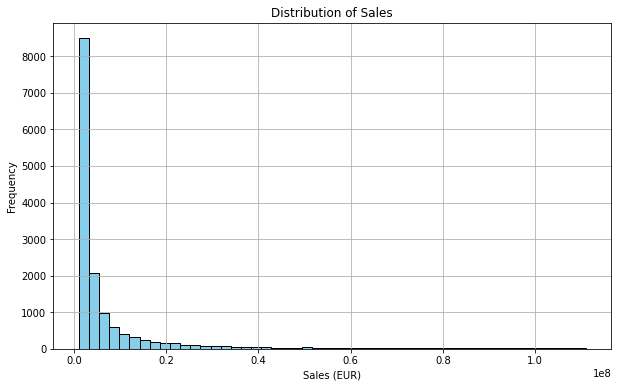

In [118]:
plt.figure(figsize=(10, 6))
plt.hist(data[data['sales']>1000000]['sales'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales (EUR)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#  Making 3 Models

In [88]:
# Step 2: Split the data into features (X) and target variable (y)
X = data.drop('default', axis=1)
y = data['default']

In [89]:
# Step 3: Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [90]:
# Step 4: Split the data into training and testing sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42, stratify=y)

In [91]:
# Step 5: Train three different models
# Model 1: Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [92]:
# Model 2: Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [93]:
# Model 3: Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [94]:
# Step 6: Evaluate the performance of each model on holdout_sample

In [95]:
# Calculate Brier score for each model
logreg_brier_score = brier_score_loss(holdout_data['default'], logreg_model.predict_proba(holdout_data.drop('default', axis=1))[:,1])
rf_brier_score = brier_score_loss(holdout_data['default'], rf_model.predict_proba(holdout_data.drop('default', axis=1))[:,1])
gb_brier_score = brier_score_loss(holdout_data['default'], gb_model.predict_proba(holdout_data.drop('default', axis=1))[:,1])
holdout_data
print("Brier Score:")
print("Logistic Regression:", logreg_brier_score)
print("Random Forest Classifier:", rf_brier_score)
print("Gradient Boosting Classifier:", gb_brier_score)

Brier Score:
Logistic Regression: 0.002422245906404418
Random Forest Classifier: 0.0026454413332041467
Gradient Boosting Classifier: 0.002525221987536404


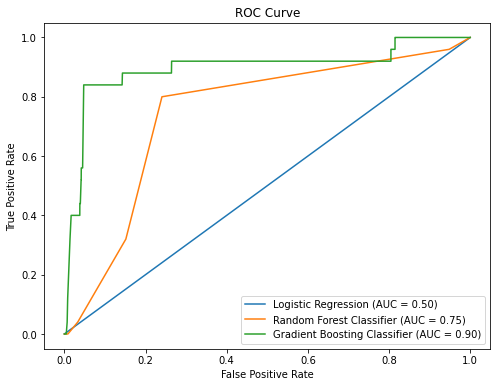

In [96]:
# Plot ROC curves and calculate AUC for each model
def plot_roc_curve(model, X_test, y_test, name):
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr, label=name + f' (AUC = {auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

plt.figure(figsize=(8, 6))
plot_roc_curve(logreg_model, holdout_data.drop('default', axis=1), holdout_data['default'], 'Logistic Regression')
plot_roc_curve(rf_model, holdout_data.drop('default', axis=1), holdout_data['default'], 'Random Forest Classifier')
plot_roc_curve(gb_model, holdout_data.drop('default', axis=1), holdout_data['default'], 'Gradient Boosting Classifier')
plt.show()

In [97]:
# Calculate accuracy, sensitivity, and specificity for each model using optimal threshold
def calculate_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return accuracy, sensitivity, specificity

In [98]:
def calculate_optimal_threshold(model, X_test, y_test):
    thresholds = np.arange(0, 1.05, 0.05)
    optimal_threshold = None
    optimal_metrics = None
    for threshold in thresholds:
        y_pred = (model.predict_proba(X_test)[:,1] >= threshold).astype(int)
        accuracy, sensitivity, specificity = calculate_metrics(y_test, y_pred)
        if optimal_metrics is None or accuracy + sensitivity + specificity > sum(optimal_metrics):
            optimal_threshold = threshold
            optimal_metrics = (accuracy, sensitivity, specificity)
    return optimal_threshold, optimal_metrics

In [99]:
logreg_optimal_threshold, logreg_metrics = calculate_optimal_threshold(logreg_model, holdout_data.drop('default', axis=1), holdout_data['default'])
rf_optimal_threshold, rf_metrics = calculate_optimal_threshold(rf_model, holdout_data.drop('default', axis=1), holdout_data['default'])
gb_optimal_threshold, gb_metrics = calculate_optimal_threshold(gb_model, holdout_data.drop('default', axis=1), holdout_data['default'])


In [100]:
print("\nOptimal Threshold and Metrics:")
print("Logistic Regression: Threshold =", logreg_optimal_threshold, ", Accuracy =", logreg_metrics[0], ", Sensitivity =", logreg_metrics[1], ", Specificity =", logreg_metrics[2])
print("Random Forest Classifier: Threshold =", rf_optimal_threshold, ", Accuracy =", rf_metrics[0], ", Sensitivity =", rf_metrics[1], ", Specificity =", rf_metrics[2])
print("Gradient Boosting Classifier: Threshold =", gb_optimal_threshold, ", Accuracy =", gb_metrics[0], ", Sensitivity =", gb_metrics[1], ", Specificity =", gb_metrics[2])



Optimal Threshold and Metrics:
Logistic Regression: Threshold = 0.05 , Accuracy = 0.9975777540935956 , Sensitivity = 0.0 , Specificity = 1.0
Random Forest Classifier: Threshold = 0.35000000000000003 , Accuracy = 0.9975777540935956 , Sensitivity = 0.0 , Specificity = 1.0
Gradient Boosting Classifier: Threshold = 1.0 , Accuracy = 0.9975777540935956 , Sensitivity = 0.0 , Specificity = 1.0


In [101]:
# Calculate expected loss for each model
loss_FN = 15
loss_FP = 3

In [102]:
def calculate_expected_loss(y_true, y_pred, loss_FN, loss_FP):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    expected_loss = loss_FN * fn + loss_FP * fp
    return expected_loss

In [103]:

logreg_expected_loss = calculate_expected_loss(holdout_data['default'], (logreg_model.predict_proba(holdout_data.drop('default', axis=1))[:,1] >= logreg_optimal_threshold).astype(int), loss_FN, loss_FP)
rf_expected_loss = calculate_expected_loss(holdout_data['default'], (rf_model.predict_proba(holdout_data.drop('default', axis=1))[:,1] >= rf_optimal_threshold).astype(int), loss_FN, loss_FP)
gb_expected_loss = calculate_expected_loss(holdout_data['default'], (gb_model.predict_proba(holdout_data.drop('default', axis=1))[:,1] >= gb_optimal_threshold).astype(int), loss_FN, loss_FP)


In [104]:
print("\nExpected Loss:")
print("Logistic Regression:", logreg_expected_loss)
print("Random Forest Classifier:", rf_expected_loss)
print("Gradient Boosting Classifier:", gb_expected_loss)


Expected Loss:
Logistic Regression: 375
Random Forest Classifier: 375
Gradient Boosting Classifier: 375


In [105]:
# Additional: Classification Matrix
def print_classification_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("\nClassification Matrix:")
    print(classification_report(y_test, y_pred))

print_classification_matrix(logreg_model, holdout_data.drop('default', axis=1), holdout_data['default'])
print_classification_matrix(rf_model, holdout_data.drop('default', axis=1), holdout_data['default'])
print_classification_matrix(gb_model, holdout_data.drop('default', axis=1), holdout_data['default'])


Classification Matrix:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10296
           1       0.00      0.00      0.00        25

    accuracy                           1.00     10321
   macro avg       0.50      0.50      0.50     10321
weighted avg       1.00      1.00      1.00     10321


Classification Matrix:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10296
           1       0.00      0.00      0.00        25

    accuracy                           1.00     10321
   macro avg       0.50      0.50      0.50     10321
weighted avg       1.00      1.00      1.00     10321


Classification Matrix:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10296
           1       0.00      0.00      0.00        25

    accuracy                           1.00     10321
   macro avg       0.50      0.50      0.50     10321
we